In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("W_Recipe_Data.xlsx")
data

/Users/harrychang/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,user_id,version_no,name,description,created_at,updated_at,applications,categories,business_objects,runnable,running,job_succeeded_count,job_failed_count,parent_id
0,8908033,69632,1,List Contacts for forecasted Opportunities wit...,Contact these Opportunities\n\nOpportunities c...,2019-02-04T09:22:22.833-08:00,2019-02-08T15:26:42.846-08:00,"{skype_bot,salesforce,skype_bot}","{Bots,""Artificial Intelligence"",CRM,Marketing}","{command,user,message,opportunity,account}",False,False,0,0,491367.0
1,9890804,69632,1,Show Opportunity details,Show Opportunity details in Salesforce,2019-02-04T09:22:23.115-08:00,2019-02-08T15:26:42.823-08:00,"{skype_bot,salesforce,skype_bot}","{Bots,""Artificial Intelligence"",CRM,Marketing}","{command,opportunity,message,account}",False,False,0,0,491369.0
2,1890806,69632,1,List recents Tickets in Zendesk,List recent tickets in Zendesk,2019-02-04T09:22:23.543-08:00,2019-02-08T15:26:42.777-08:00,"{skype_bot,skype_bot,zendesk}","{Bots,""Artificial Intelligence"",""Customer Serv...","{command,message,ticket}",False,False,0,0,493053.0
3,1890807,69632,1,Create Ticket in Zendesk,Create Ticket in Zendesk,2019-02-04T09:22:23.775-08:00,2019-02-08T15:26:42.755-08:00,"{skype_bot,skype_bot,zendesk}","{Bots,""Artificial Intelligence"",""Customer Serv...","{command,message,ticket}",False,False,0,0,493056.0
4,8830654,68728,1,List Open Cases,Top Priority Open Cases \n\nPosted Daily at 9a...,2019-01-17T14:03:51.609-08:00,2019-01-17T14:03:51.609-08:00,"{skype_bot,salesforce,skype_bot}","{Bots,""Artificial Intelligence"",CRM,Marketing}","{command,case,message,user}",False,False,0,0,491358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8830836,45431,2,(0) New SMS/MMS from Twilio for Loan Applicati...,This integration triggers upon a message recei...,2019-03-01T08:02:13.817-08:00,2019-03-01T08:02:32.147-08:00,"{twilio,salesforce,twilio,rest,workato_variabl...","{Communication,""Developer Tool"",CRM,Marketing,...","{sms,file,""content document link""}",False,False,0,0,903826.0
96,8830838,54567,2,Copy of Copy of Final-Active Pipeline Report,When there is a new/updated record in Quick Ba...,2019-02-15T00:45:20.116-08:00,2019-02-15T00:47:44.493-08:00,"{quickbase,smartsheet}","{""Project Management"",Document/File}",{record},False,False,45,0,893030.0
97,8830840,72284,1,Show Issue details in JIRA,Show Issue details in JIRA,2019-02-24T13:52:28.143-08:00,2019-02-24T13:52:28.143-08:00,"{slack_bot,slack_bot,jira}","{Bots,""Artificial Intelligence"",""Project Manag...","{command,message,issue}",False,False,0,0,57784.0
98,8830842,72284,1,List Issues in Jira,List recent issues with optional parameters,2019-02-24T13:52:28.491-08:00,2019-02-24T13:52:28.491-08:00,"{slack_bot,slack_bot,jira}","{Bots,""Artificial Intelligence"",""Project Manag...","{command,message,issue}",False,False,0,0,295418.0


In [3]:
def parse_list_field(s):
    if isinstance(s, str) and s.startswith("{") and s.endswith("}"):
        return [item.strip() for item in s[1:-1].split(",")]
    else:
        return []
    
# Assuming 'data' is your original DataFrame
data['applications'] = data['applications'].apply(parse_list_field)
data['categories'] = data['categories'].apply(parse_list_field)
data['business_objects'] = data['business_objects'].apply(parse_list_field)

data

,id,user_id,version_no,name,description,created_at,updated_at,applications,categories,business_objects,runnable,running,job_succeeded_count,job_failed_count,parent_id
0,8908033,69632,1,List Contacts for forecasted Opportunities wit...,Contact these Opportunities\n\nOpportunities c...,2019-02-04T09:22:22.833-08:00,2019-02-08T15:26:42.846-08:00,"[skype_bot, salesforce, skype_bot]","[Bots, ""Artificial Intelligence"", CRM, Marketing]","[command, user, message, opportunity, account]",False,False,0,0,491367.0
1,9890804,69632,1,Show Opportunity details,Show Opportunity details in Salesforce,2019-02-04T09:22:23.115-08:00,2019-02-08T15:26:42.823-08:00,"[skype_bot, salesforce, skype_bot]","[Bots, ""Artificial Intelligence"", CRM, Marketing]","[command, opportunity, message, account]",False,False,0,0,491369.0
2,1890806,69632,1,List recents Tickets in Zendesk,List recent tickets in Zendesk,2019-02-04T09:22:23.543-08:00,2019-02-08T15:26:42.777-08:00,"[skype_bot, skype_bot, zendesk]","[Bots, ""Artificial Intelligence"", ""Customer Se...","[command, message, ticket]",False,False,0,0,493053.0
3,1890807,69632,1,Create Ticket in Zendesk,Create Ticket in Zendesk,2019-02-04T09:22:23.775-08:00,2019-02-08T15:26:42.755-08:00,"[skype_bot, skype_bot, zendesk]","[Bots, ""Artificial Intelligence"", ""Customer Se...","[command, message, ticket]",False,False,0,0,493056.0
4,8830654,68728,1,List Open Cases,Top Priority Open Cases \n\nPosted Daily at 9a...,2019-01-17T14:03:51.609-08:00,2019-01-17T14:03:51.609-08:00,"[skype_bot, salesforce, skype_bot]","[Bots, ""Artificial Intelligence"", CRM, Marketing]","[command, case, message, user]",False,False,0,0,491358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8830836,45431,2,(0) New SMS/MMS from Twilio for Loan Applicati...,This integration triggers upon a message recei...,2019-03-01T08:02:13.817-08:00,2019-03-01T08:02:32.147-08:00,"[twilio, salesforce, twilio, rest, workato_var...","[Communication, ""Developer Tool"", CRM, Marketi...","[sms, file, ""content document link""]",False,False,0,0,903826.0
96,8830838,54567,2,Copy of Copy of Final-Active Pipeline Report,When there is a new/updated record in Quick Ba...,2019-02-15T00:45:20.116-08:00,2019-02-15T00:47:44.493-08:00,"[quickbase, smartsheet]","[""Project Management"", Document/File]",[record],False,False,45,0,893030.0
97,8830840,72284,1,Show Issue details in JIRA,Show Issue details in JIRA,2019-02-24T13:52:28.143-08:00,2019-02-24T13:52:28.143-08:00,"[slack_bot, slack_bot, jira]","[Bots, ""Artificial Intelligence"", ""Project Man...","[command, message, issue]",False,False,0,0,57784.0
98,8830842,72284,1,List Issues in Jira,List recent issues with optional parameters,2019-02-24T13:52:28.491-08:00,2019-02-24T13:52:28.491-08:00,"[slack_bot, slack_bot, jira]","[Bots, ""Artificial Intelligence"", ""Project Man...","[command, message, issue]",False,False,0,0,295418.0


In [4]:
# Users table (assuming no access to other User data)
users = data[['user_id']].drop_duplicates()
users

,user_id
0,69632
4,68728
5,54427
6,54810
7,17354
8,69475
9,23019
10,16796
11,53282
12,65753


In [5]:
# Recipes table
recipes = data[['id', 'user_id', 'version_no', 'name', 'description', 'created_at', 'updated_at', 'runnable', 'running', 'job_succeeded_count', 'job_failed_count', 'parent_id']]
recipes

,id,user_id,version_no,name,description,created_at,updated_at,runnable,running,job_succeeded_count,job_failed_count,parent_id
0,8908033,69632,1,List Contacts for forecasted Opportunities wit...,Contact these Opportunities\n\nOpportunities c...,2019-02-04T09:22:22.833-08:00,2019-02-08T15:26:42.846-08:00,False,False,0,0,491367.0
1,9890804,69632,1,Show Opportunity details,Show Opportunity details in Salesforce,2019-02-04T09:22:23.115-08:00,2019-02-08T15:26:42.823-08:00,False,False,0,0,491369.0
2,1890806,69632,1,List recents Tickets in Zendesk,List recent tickets in Zendesk,2019-02-04T09:22:23.543-08:00,2019-02-08T15:26:42.777-08:00,False,False,0,0,493053.0
3,1890807,69632,1,Create Ticket in Zendesk,Create Ticket in Zendesk,2019-02-04T09:22:23.775-08:00,2019-02-08T15:26:42.755-08:00,False,False,0,0,493056.0
4,8830654,68728,1,List Open Cases,Top Priority Open Cases \n\nPosted Daily at 9a...,2019-01-17T14:03:51.609-08:00,2019-01-17T14:03:51.609-08:00,False,False,0,0,491358.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,8830836,45431,2,(0) New SMS/MMS from Twilio for Loan Applicati...,This integration triggers upon a message recei...,2019-03-01T08:02:13.817-08:00,2019-03-01T08:02:32.147-08:00,False,False,0,0,903826.0
96,8830838,54567,2,Copy of Copy of Final-Active Pipeline Report,When there is a new/updated record in Quick Ba...,2019-02-15T00:45:20.116-08:00,2019-02-15T00:47:44.493-08:00,False,False,45,0,893030.0
97,8830840,72284,1,Show Issue details in JIRA,Show Issue details in JIRA,2019-02-24T13:52:28.143-08:00,2019-02-24T13:52:28.143-08:00,False,False,0,0,57784.0
98,8830842,72284,1,List Issues in Jira,List recent issues with optional parameters,2019-02-24T13:52:28.491-08:00,2019-02-24T13:52:28.491-08:00,False,False,0,0,295418.0


In [6]:
# Apps table
apps = data['applications'].apply(pd.Series).stack().reset_index(drop=True).drop_duplicates().reset_index(drop=True)
apps = pd.DataFrame({'id': apps.index, 'app_name': apps})
apps

,id,app_name
0,0,skype_bot
1,1,salesforce
2,2,zendesk
3,3,quickbooks
4,4,email
5,5,rest
6,6,logger
7,7,mysql
8,8,workato_service
9,9,clock


In [7]:
# Recipe_Applications table
recipe_applications = data['applications'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='app_name')
recipe_applications.columns = ['recipe_id', 'app_name']
recipe_applications = recipe_applications.merge(apps, on='app_name', how='left')[['recipe_id', 'id']]
recipe_applications.columns = ['recipe_id', 'app_id']
recipe_applications

,recipe_id,app_id
0,0,0
1,0,1
2,0,0
3,1,0
4,1,1
...,...,...
314,97,43
315,98,29
316,98,29
317,98,43


In [8]:
# Categories table
categories = data['categories'].apply(pd.Series).stack().reset_index(drop=True).drop_duplicates().reset_index(drop=True)
categories = pd.DataFrame({'id': categories.index, 'category_name': categories})
categories

,id,category_name
0,0,Bots
1,1,"""Artificial Intelligence"""
2,2,CRM
3,3,Marketing
4,4,"""Customer Service"""
5,5,Accounting
6,6,"""Recipe Tools"""
7,7,"""Developer Tool"""
8,8,"""API Integration"""
9,9,Database


In [9]:
# App_Categories table
app_categories = data['categories'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='category_name')
app_categories.columns = ['app_id', 'category_name']
app_categories = app_categories.merge(categories, on='category_name', how='left')[['app_id', 'id']]
app_categories.columns = ['app_id', 'category_id']
app_categories

,app_id,category_id
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
...,...,...
297,97,11
298,98,0
299,98,1
300,98,11


In [10]:
# Business_Objects table
business_objects = data['business_objects'].apply(pd.Series).stack().reset_index(drop=True).drop_duplicates().reset_index(drop=True)
business_objects = pd.DataFrame({'id': business_objects.index, 'object_name': business_objects})
business_objects

,id,object_name
0,0,command
1,1,user
2,2,message
3,3,opportunity
4,4,account
5,5,ticket
6,6,case
7,7,email
8,8,
9,9,invoice


In [11]:
# App_Business_Objects table
app_business_objects = data['business_objects'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='object_name')
app_business_objects.columns = ['app_id', 'object_name']
app_business_objects = app_business_objects.merge(business_objects, on='object_name', how='left')[['app_id', 'id']]
app_business_objects.columns = ['app_id', 'business_object_id']
app_business_objects

,app_id,business_object_id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
208,97,27
209,98,0
210,98,2
211,98,27


In [12]:
target_apps = apps[apps['app_name'].isin(['salesforce', 'zendesk', 'box', 'slack'])]
active_recipes = recipes[recipes['running']]

active_recipes_with_target_apps = active_recipes.merge(recipe_applications, left_on='id', right_on='recipe_id').merge(target_apps, left_on='app_id', right_on='id')
users_with_active_recipes = users[users['user_id'].isin(active_recipes_with_target_apps['user_id'].unique())]

In [13]:
target_apps

,id,app_name
1,1,salesforce
2,2,zendesk
34,34,box
38,38,slack


In [14]:
active_recipes

,id,user_id,version_no,name,description,created_at,updated_at,runnable,running,job_succeeded_count,job_failed_count,parent_id
8,8830662,69475,10,Delete all files in Google Drive on a daily in...,"When there is a trigger event, do action",2019-02-06T17:09:55.122-08:00,2019-02-08T06:47:48.914-08:00,False,True,28,0,NaN
18,8830682,31498,5,EY Shire_Child_Update User_Prod,"When there is a trigger event, do action",2019-01-02T14:34:03.531-08:00,2019-01-07T14:48:55.974-08:00,False,True,312,0,862694.0
19,8830684,61451,5,Brochure Request Thank You,"When there is a new event via HTTP webhook, se...",2019-01-29T10:05:37.878-08:00,2019-02-07T09:21:40.999-08:00,False,True,8,0,NaN
20,8830686,69758,2,Callable - Get external id from cache,"When there is a new call for callable recipe, ...",2019-02-11T00:25:26.610-08:00,2019-03-05T01:18:34.868-08:00,False,True,0,0,NaN
27,8830700,69758,2,CoLAB - SF - Callable -Â Retrieve account snap...,"When there is a new call for callable recipe, ...",2019-02-11T00:25:24.099-08:00,2019-03-05T01:18:32.948-08:00,False,True,61,0,NaN
54,8830754,69758,2,CoLAB - SF - Callable - Process contact changes,"When there is a new call for callable recipe, ...",2019-02-11T00:25:10.021-08:00,2019-03-05T01:18:12.656-08:00,False,True,30,0,NaN
55,8830756,43517,3,(PROD) Marketo Consent Updates to Salesforce C...,"When there is a trigger event, do action",2019-02-11T14:39:08.100-08:00,2019-02-11T15:39:40.639-08:00,False,True,0,0,848335.0
57,8830760,18194,18,Lead Tagged 'Sync with Salesforce' in Intercom...,"When there is a new event via HTTP webhook, cr...",2019-02-10T03:17:56.420-08:00,2019-02-10T12:18:04.731-08:00,False,True,8,0,NaN
64,8830774,31498,15,Child_CriticalRealm: Approved Expense sheet fr...,"When there is a trigger event, do action",2019-02-28T20:09:28.265-08:00,2019-03-05T12:44:55.603-08:00,False,True,2,1,888537.0


In [15]:
active_recipes_with_target_apps

,id_x,user_id,version_no,name,description,created_at,updated_at,runnable,running,job_succeeded_count,job_failed_count,parent_id,recipe_id,app_id,id_y,app_name


In [16]:
active_recipes['is_original'] = active_recipes['parent_id'].isna()
recipe_counts = active_recipes['is_original'].value_counts(normalize=True) * 100
recipe_counts

<ipython-input-16-0c8b918a5b91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_recipes['is_original'] = active_recipes['parent_id'].isna()


True     66.666667
False    33.333333
Name: is_original, dtype: float64

In [19]:
recipe_app_count = recipe_applications.groupby('recipe_id').size().reset_index(name='app_count')
recipe_distribution = recipe_app_count['app_count'].value_counts().reset_index().rename(columns={'index': 'num_apps', 'app_count': 'count'}).sort_values(by='count', ascending=False)

In [20]:
recipe_app_count

,recipe_id,app_count
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
95,95,9
96,96,2
97,97,3
98,98,3


In [21]:
recipe_distribution

,num_apps,count
0,3,38
1,2,31
2,1,9
3,4,9
4,9,4
5,6,3
6,5,2
7,8,2
8,7,1
9,11,1


In [22]:
# Summary statistics and data types
# Assuming 'data' is your main dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   100 non-null    int64  
 1   user_id              100 non-null    int64  
 2   version_no           100 non-null    int64  
 3   name                 100 non-null    object 
 4   description          99 non-null     object 
 5   created_at           100 non-null    object 
 6   updated_at           100 non-null    object 
 7   applications         100 non-null    object 
 8   categories           100 non-null    object 
 9   business_objects     100 non-null    object 
 10  runnable             100 non-null    bool   
 11  running              100 non-null    bool   
 12  job_succeeded_count  100 non-null    int64  
 13  job_failed_count     100 non-null    int64  
 14  parent_id            69 non-null     float64
dtypes: bool(2), float64(1), int64(5), object(

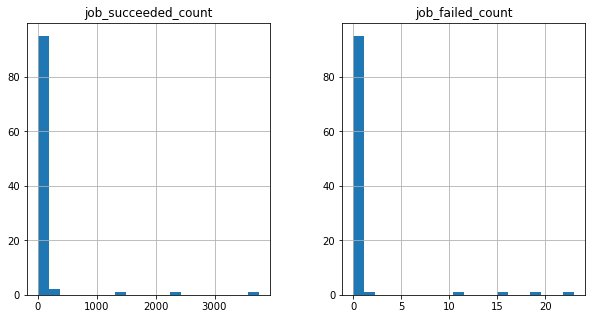

In [23]:
# Distribution of numerical variables
data[['job_succeeded_count', 'job_failed_count']].hist(bins=20, figsize=(10, 5))
plt.show()

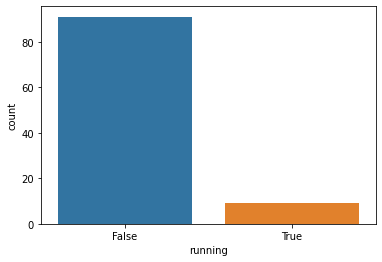

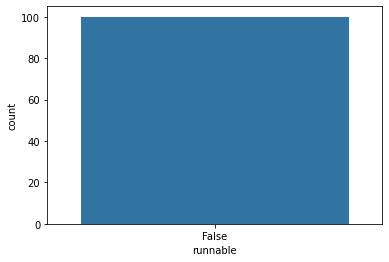

In [24]:
# Distribution of categorical variables
sns.countplot(data=data, x='running')
plt.show()

sns.countplot(data=data, x='runnable')
plt.show()

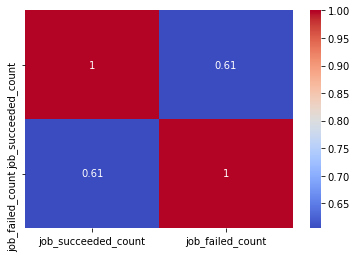

In [25]:
# Correlation between numerical variables
sns.heatmap(data[['job_succeeded_count', 'job_failed_count']].corr(), annot=True, cmap='coolwarm')
plt.show()

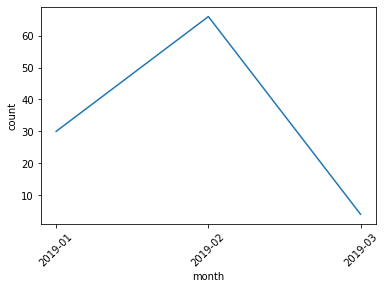

In [28]:
# Time series analysis
data['created_at'] = pd.to_datetime(data['created_at'])
data['month'] = data['created_at'].dt.to_period('M')
monthly_recipe_count = data.groupby('month')['id'].count().reset_index(name='count')

# Convert the 'month' column to strings using strftime
monthly_recipe_count['month'] = monthly_recipe_count['month'].apply(lambda x: x.strftime('%Y-%m'))

sns.lineplot(data=monthly_recipe_count, x='month', y='count')
plt.xticks(rotation=45)
plt.show()

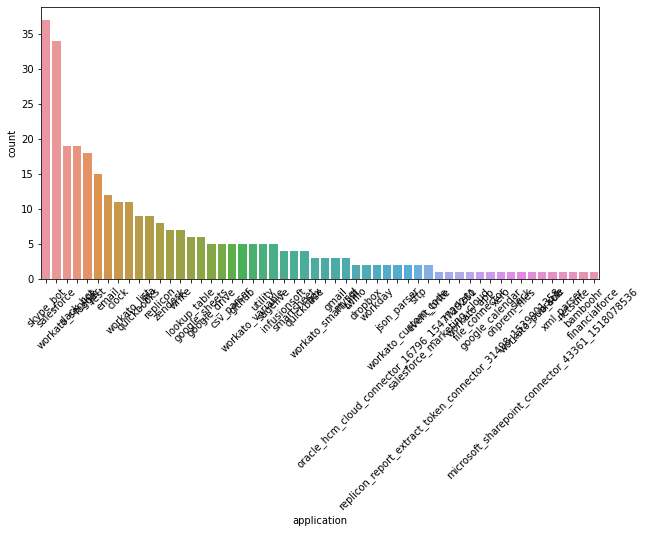

In [29]:
# Application usage
app_counts = data['applications'].explode().value_counts().reset_index()
app_counts.columns = ['application', 'count']

plt.figure(figsize=(10, 5))
sns.barplot(data=app_counts, x='application', y='count')
plt.xticks(rotation=45)
plt.show()

/Users/harrychang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


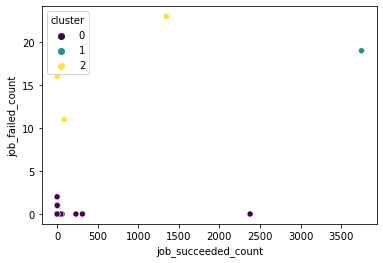

   Cluster  Count
0        0     96
1        2      3
2        1      1


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['job_succeeded_count', 'job_failed_count']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clustering results
sns.scatterplot(data=data, x='job_succeeded_count', y='job_failed_count', hue='cluster', palette='viridis')
plt.show()

cluster_counts = data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
print(cluster_counts)

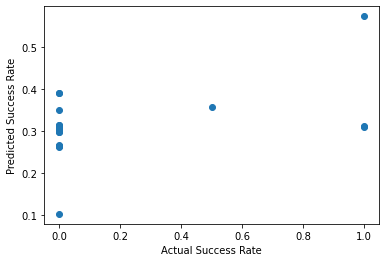

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data['success_rate'] = data['job_succeeded_count'] / (data['job_succeeded_count'] + data['job_failed_count'])
data['success_rate'] = data['success_rate'].fillna(0)
data['num_applications'] = data['applications'].apply(len)
# Fill missing descriptions with an empty string and then compute their lengths
data['description'] = data['description'].fillna('')
data['description_length'] = data['description'].apply(len)

# Proceed with the regression analysis as before
X = data[['num_applications', 'description_length']]
y = data['success_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Visualize the actual vs. predicted success rates
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Success Rate')
plt.ylabel('Predicted Success Rate')
plt.show()